In [1]:
from wordcloud.wordcloud import WordCloud #wordcloud
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder #labelecoding
encoder = LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer #stemming in nltk
ps = PorterStemmer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#reading the data in csv file format
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1234,ham,\Hello-/@drivby-:0quit edrunk sorry iff pthis ...,NaN,NaN,NaN
3787,spam,Want to funk up ur fone with a weekly new tone...,NaN,NaN,NaN
2413,ham,Lol please do. Actually send a pic of yourself...,NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 2'],axis= 1,inplace = True) #removing redundant columns

In [8]:
df.drop(['Unnamed: 3'],axis= 1,inplace = True)
df.drop(['Unnamed: 4'],axis= 1,inplace = True)

In [9]:
df.shape

(5572, 2)

In [10]:
df.rename(columns = {'v1':'target'}, inplace = True)

In [11]:
df.rename(columns = {'v2':'text'}, inplace = True)

In [12]:
df.rename(columns={'message ':'text'},inplace=True)
df.sample(5)

,target,text
2800,ham,Depends on where u going lor.
4972,ham,Oops I was in the shower when u called. Hey a ...
1719,ham,Then u better go sleep.. Dun disturb u liao.. ...
2079,ham,I can take you at like noon
1188,ham,All will come alive.better correct any good lo...


In [13]:
df.rename(columns={'Message':'text'},inplace=True)

In [14]:
df.rename(columns={'Category':'target'},inplace=True)

In [15]:
#label encoder wihtout using the encoder
df.loc[df['target'] == 'spam', 'target',] = 0
df.loc[df['target'] == 'ham', 'target',] = 1

In [16]:
df.sample(5)

,target,text
1847,0,FREE NOKIA Or Motorola with upto 12mths 1/2pri...
4187,1,Mm umma ask vava also to come tell him can pla...
2126,1,You do got a shitload of diamonds though
3204,1,"Oh, yes, I've just been a little under the wea..."
277,1,"Awesome, I'll see you in a bit"


In [17]:
df.head(6)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...


In [18]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#duplicates number printing
df.duplicated().sum()

403

In [20]:
#droping the duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.shape

(5169, 2)

In [22]:
#spam ham count
df['target'].value_counts()

target
1    4516
0     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

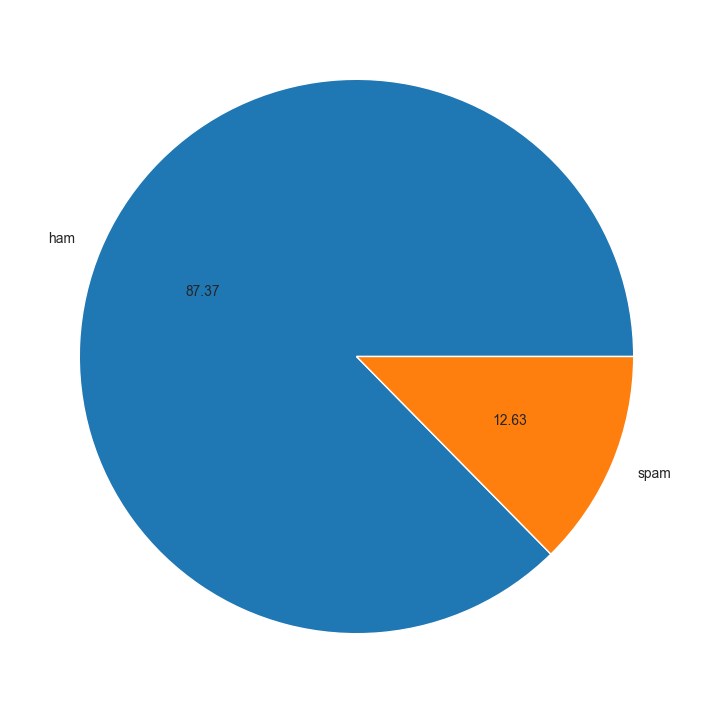

In [23]:
#piechart showing that data is not balanced
plt.figure(figsize=(15,9))
plt.pie (df['target'].value_counts(), labels=['ham','spam'],autopct="%.2f")
plt.show

In [24]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df.head(5)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['char_count']=df['text'].apply(len) #char count

In [27]:
df.head(5)

,target,text,char_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['word_count']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))#word count

In [29]:
df.head()

,target,text,char_count,word_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['sent_count']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))#sentence count

In [31]:
df.head()

,target,text,char_count,word_count,sent_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#ham messages
df[df['target']==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#spam messages
df[df['target']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
def transform_text(text):
  #lower case
  text = text.lower()
  #tokenization
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  #punctuation and stopwords removal
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)
  #stemming
  text = y[:]
  y.clear()
  for i in text :
    y.append(ps.stem(i))

  return " ".join(y)

In [36]:
#transform_text checking
transform_text('my name is demon of the hidden mist')

'name demon hidden mist'

In [37]:
#tranformed words
df['transformed_text']=df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


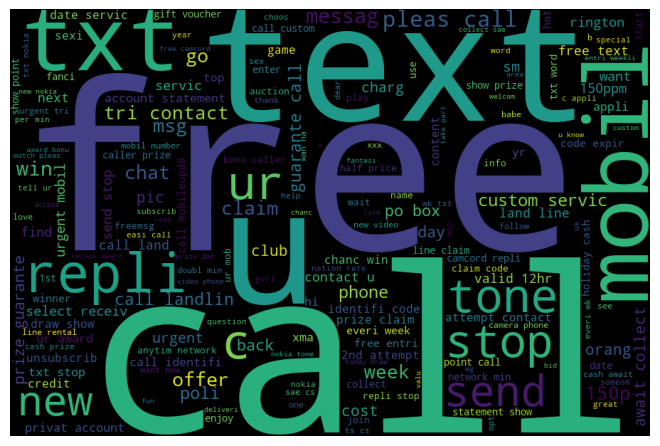

In [39]:
#word cloud generation for the spam
from wordcloud import WordCloud
wc = WordCloud(width=900,height=600,min_font_size=10,background_color='black').generate(" ".join(df[df['target']==0]['transformed_text'].astype(str)))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

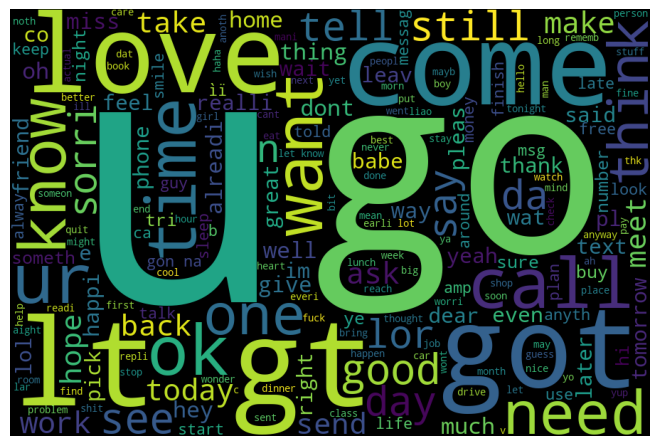

In [40]:
#word cloud generation for the ham
wc1 = WordCloud(width=900,height=600,min_font_size=10,background_color='black').generate(" ".join(df[df['target']==1]['transformed_text'].astype(str)))
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [41]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
#most common words in spam
spam_corpus= [] #empty list
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [43]:
len(spam_corpus)#length of spam words

9939

In [44]:
#counter of all words in spam
(Counter(spam_corpus).most_common(10))

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [45]:
#most common words in ham
ham_corpus= [] #empty list
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [46]:
len(ham_corpus)#length of spam words

35404

In [47]:
#counter of all words in ham
(Counter(ham_corpus).most_common(10))

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

**ALGORITHMS USED ARE:**

GaussianNB

MultinomialNB

BernoulliNB

LogisticRegression

RandomForestClassifier

DecisionTreeClassifier

KNeighborsClassifier

SVC

GradientBoostingClassifier


In [48]:
#vectorized as bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
#scalling the dataframe using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [52]:
X.shape

(5169, 3000)

In [53]:
y = df['target'].values

In [54]:
y=y.astype('int') #array is recognised as object so it is converted to int array


In [55]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2)

In [58]:
#importing all the algorithms
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [59]:
#creating objects for the algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
rfc = RandomForestClassifier()
dt= DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc= SVC()
gbc = GradientBoostingClassifier()
#for voting .
clfs = {
          'gaussianNB': gnb,
          'multinomialNB': mnb,
          'bernoulliNB': bnb,
          'legistic regression':lg,
          'randomforest':rfc,
          'decisontree':dt,
          'knn':knn,
          'supportvectorMachine':svc,
          'gradientBoostingClassifier':gbc

        }

In [60]:
#gaussian naive bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred1))
print("precision score: ",precision_score(y_test,y_pred1))


accuracy score:  0.8755641521598968
precision score:  0.9771054783319706


In [61]:
#multinomial naive bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))

accuracy score:  0.9800128949065119
precision score:  0.9832727272727273


In [62]:
#bernoulli naive bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred3))
print("precision score: ",precision_score(y_test,y_pred3))

accuracy score:  0.9819471308833011
precision score:  0.9812138728323699


In [63]:
#Logistic regression
lg.fit(X_train,y_train)
y_pred4 = lg.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred4))
print("precision score: ",precision_score(y_test,y_pred4))

accuracy score:  0.9729206963249516
precision score:  0.9713876967095851


In [64]:
#random forest
rfc.fit(X_train,y_train)
y_pred5 = rfc.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred5))
print("precision score: ",precision_score(y_test,y_pred5))

accuracy score:  0.9761444229529336
precision score:  0.9755571531272466


In [65]:
#decision tree
dt.fit(X_train,y_train)
y_pred6 = dt.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred6))
print("precision score: ",precision_score(y_test,y_pred6))

accuracy score:  0.9555125725338491
precision score:  0.9735876742479824


In [66]:
#KNearestNeighbour
knn.fit(X_train,y_train)
y_pred7 = knn.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred7))
print("precision score: ",precision_score(y_test,y_pred7))

accuracy score:  0.9084461637653127
precision score:  0.906


In [67]:
#support machine vector
svc.fit(X_train,y_train)
y_pred8 = svc.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred8))
print("precision score: ",precision_score(y_test,y_pred8))

accuracy score:  0.9780786589297228
precision score:  0.9762931034482759


In [68]:
#gradient boosting classifier
gbc.fit(X_train,y_train)
y_pred9 = gbc.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred9))
print("precision score: ",precision_score(y_test,y_pred9))

accuracy score:  0.9593810444874274
precision score:  0.9602555003548616


In [69]:
#creating a funtion that can train models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [70]:
accuracy_scores = [] #array of accuracy score
precision_scores = [] #array of precion score
#for loop to run and calculate precision and accuracy score of all the model
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy*100)
    print("Precision - ",current_precision*100)
    print("-----------")
    #appended and stored in the arrays
    accuracy_scores.append(current_accuracy*100)
    precision_scores.append(current_precision*100)

For  gaussianNB
Accuracy -  87.55641521598967
Precision -  97.71054783319705
-----------
For  multinomialNB
Accuracy -  98.00128949065119
Precision -  98.32727272727273
-----------
For  bernoulliNB
Accuracy -  98.1947130883301
Precision -  98.121387283237
-----------
For  legistic regression
Accuracy -  97.29206963249516
Precision -  97.13876967095851
-----------
For  randomforest
Accuracy -  97.678916827853
Precision -  97.62589928057554
-----------
For  decisontree
Accuracy -  95.09993552546744
Precision -  97.41506646971935
-----------
For  knn
Accuracy -  90.84461637653128
Precision -  90.60000000000001
-----------
For  supportvectorMachine
Accuracy -  97.80786589297227
Precision -  97.62931034482759
-----------
For  gradientBoostingClassifier
Accuracy -  95.8736299161831
Precision -  95.95744680851064
-----------


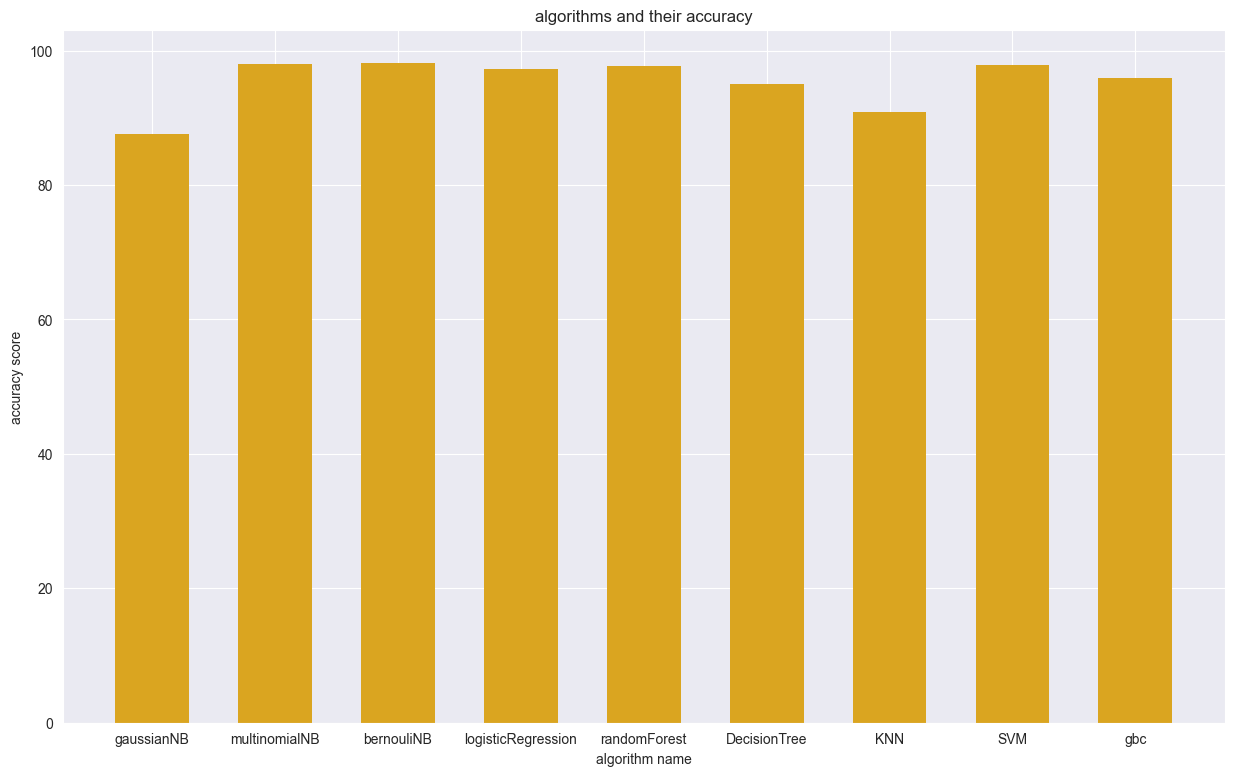

In [71]:
#creating bar graphs for accuracy of all the models
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.bar(x_axis, accuracy_scores,width=.6,color='goldenrod',edgecolor='none')
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')
plt.show()

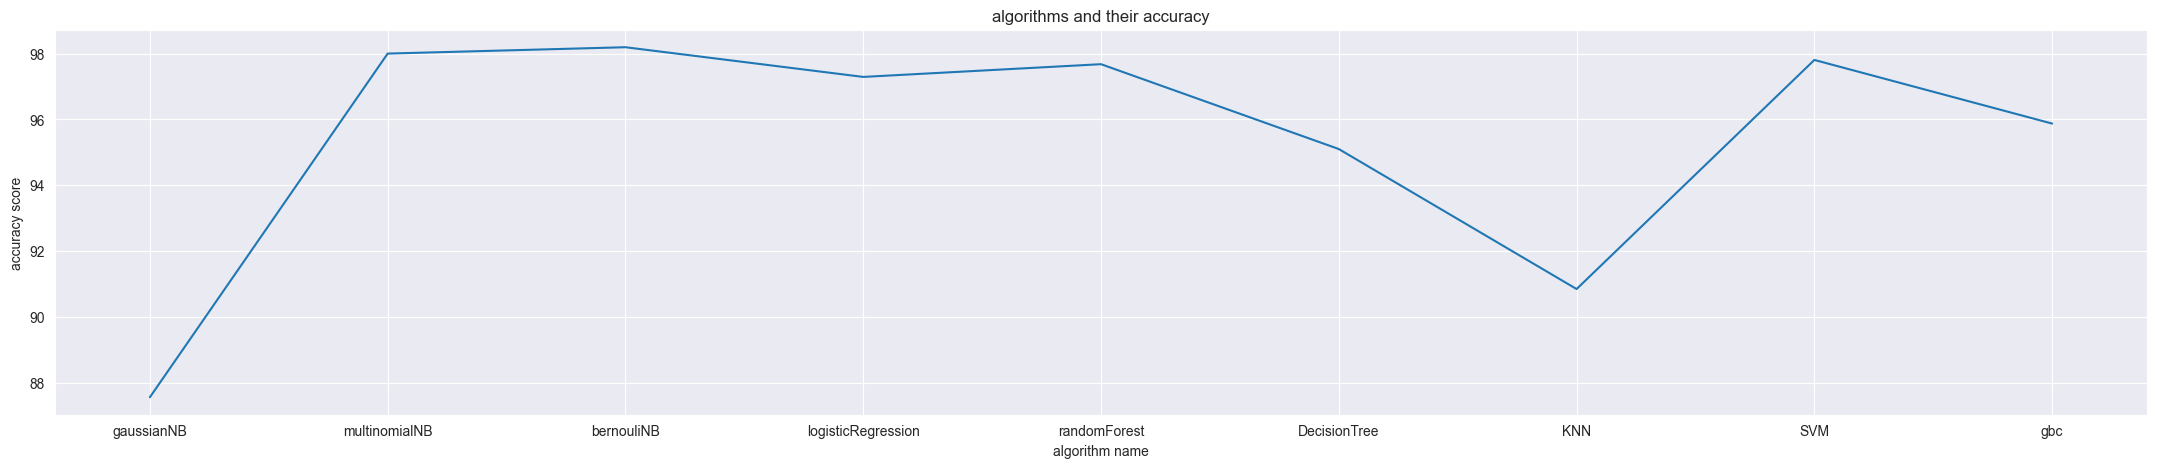

In [72]:
#creating graphs for accuracy of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.figure(figsize=(27,5))
plt.plot(x_axis,accuracy_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')

plt.show()

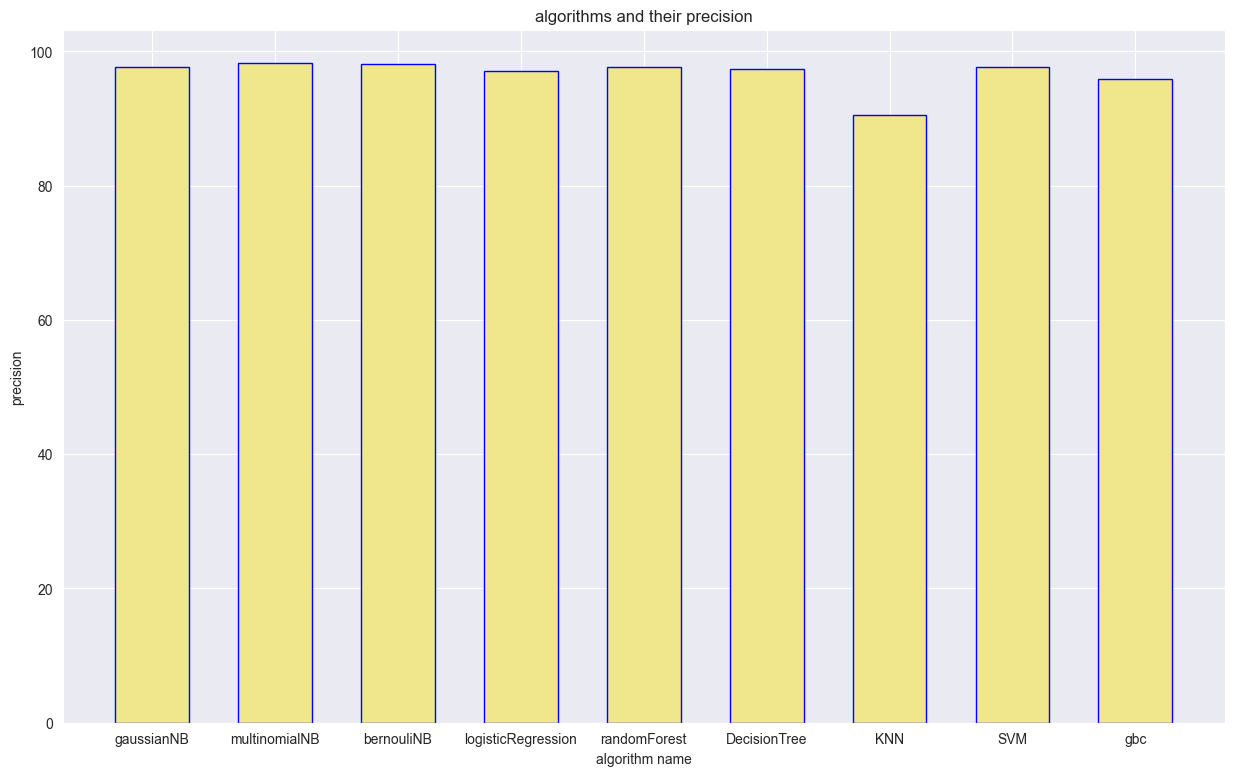

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [73]:
#creating bar graphs for precision of all the models
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.bar(x_axis,precision_scores,width=.6,color='khaki',edgecolor='blue')
plt.title('algorithms and their precision')
plt.xlabel('algorithm name')
plt.ylabel('precision')
plt.show()
plt.figure(figsize=(8,5))


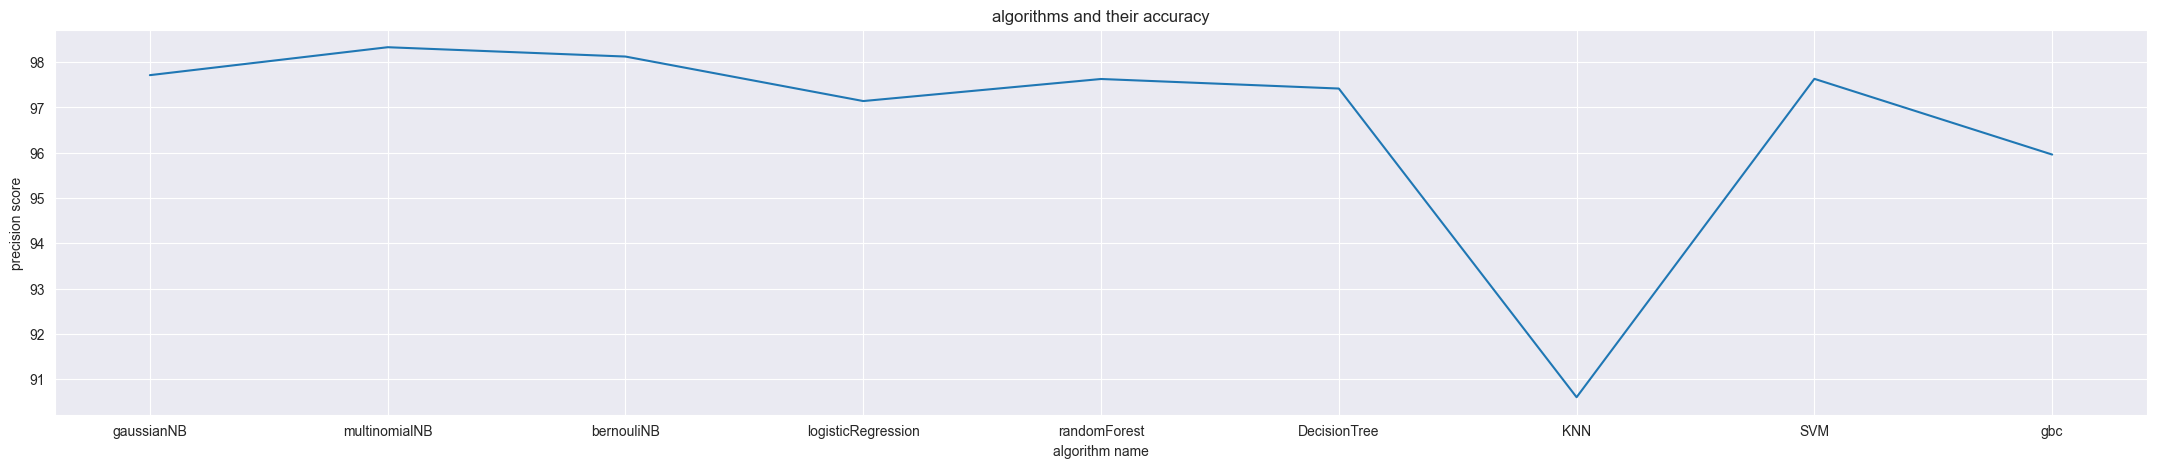

In [74]:
#creating graphs for precison of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.figure(figsize=(27,5))
plt.plot(x_axis,precision_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('precision score')
plt.show()

In [75]:
#creating a dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [77]:
performance_df1

,Algorithm,variable,value
0,multinomialNB,Accuracy,98.001289
1,bernoulliNB,Accuracy,98.194713
2,gaussianNB,Accuracy,87.556415
3,supportvectorMachine,Accuracy,97.807866
4,randomforest,Accuracy,97.678917
5,decisontree,Accuracy,95.099936
6,legistic regression,Accuracy,97.292070
7,gradientBoostingClassifier,Accuracy,95.873630
8,knn,Accuracy,90.844616
9,multinomialNB,Precision,98.327273


C:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


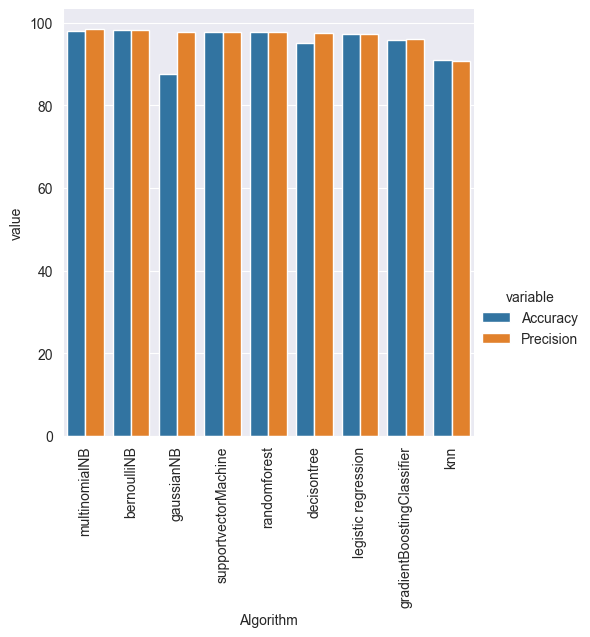

In [78]:
#comparing the the precision score and the accuracy score of all the models and selecting a model\
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

thus here multinomial naive bayes has the highest combination of accuracy and precison thus it has the best chance of success and thus the final algorithm selected is **Multinomial baive bayes**

In [79]:
!pip install gradio

In [80]:
import gradio as gr

In [81]:
def hehe(text):
    x=transform_text(text)
    vect=tfidf.transform([x])
    result=mnb.predict(vect)
    if result == 0:
        div="spam"
    else:
        div="ham"
    return div

In [82]:
demo = gr.Interface(
    fn=hehe,
    inputs=gr.Textbox(placeholder="Enter a email..."),
    outputs="label",

    examples=[["enter a email"]])

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://727c7573d8bcb4f73b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
